# Jae Wook Jung

In [1]:
# Preamble

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Econ 381 Final - Part 1 Take Home

This test has an overarching assessment objective: can my students conduct quantitative macroeconomic experiments in Python? You will be asked to perform said experiments in the context of three models: Solow-Romer, AD-AS, and DGE. You will find the basic code for each model below. 

Your tasks are:

1. Modify the code as needed
2. Conduct the quantitative experiment
3. Illustrate the results with the graphs that make the most sense given the question
4. Analyze your findings in markdown. 

Markdown allows for LaTex mathematical notation, [HERE](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index) is a link in case you want to use it (not required). Anything in math notation has to be delimited with dollar signs. Below you will find an example. Double click on this Markdown box to see how to write it in code.

- A simple equation $y=mx+b$
- A less equation with subscripts and superscripts $y=mx^{2}+b_{i}$
- An accented variable $\bar{a}$
- A fraction $\frac{x}{y}$
- Calculus notation $\frac{df(x)}{dx}$, $\frac{\partial f(x,y)}{\partial x}$

[HERE](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) is a short guide on how to use Markdown formatting. I've used some of it on this Markdown box if you want an example.



## Part 1: Solow-Romer

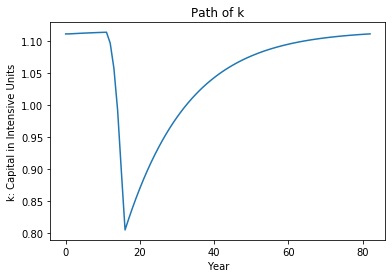

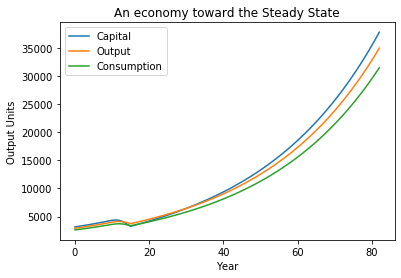

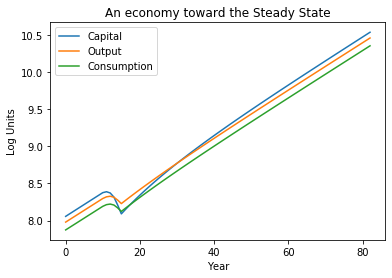

In [2]:
## Parameter Values
l = 0.01
z = 0.02/l
n = 0.012
s = 0.1
delta = 0.06
alpha = 0.33

## Define functions
# 1) Steady state of capital in intensive units

kstar = lambda s, delta, z, l, n, alpha: ((s/(delta + z*l + n)) ** (1/ (1-alpha))) * (1-l)



# 2) Output function

output=lambda K,L,A,alpha,l: K ** alpha * (A* L) ** (1-alpha) * (1-l)**(1 - alpha)

## Definiting intial values for the path of Capital, Labor, and TFP.

K0 = 900
L0 = 500 
A0 = 1.7 

##Preallocating arrays

L = np.array([L0])
A = np.array([A0])
K = np.array([K0])
Y = np.array([output(K[0],L[0],A[0],alpha,l)])
C = np.array([(1-s)*Y])
t = np.array([0])
Delta_K= np.array([0])
k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
k_ss = kstar(s, delta, z, l, n, alpha)


## Loop parameters

i = 0 #Start counter
epsilon=0.01 # while loop tolerance

## The first loop simulates an economy reaching the steady state. The second loop extends the simulation for 10 periods
## after the steady state has been reached.


while (abs(k[i] - k_ss)) >epsilon:
    i += 1    
    t = np.append(t, i) #Time vector
    L = np.append(L, L[i-1] * (1 + n)) #Labor Supply Path
    A = np.append(A, A[i-1] * (1 + z*l)) #TFP Path
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1]) #Change in capital stock
    K= np.append(K,K[i-1] + Delta_K[i]) #Capital Stock Path
    k = np.append(k,K[i] / (A[i] * L[i])) #Path of Capital in intensive units
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

    
for i in range (i, i+10):
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K = np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

# steady state values and start from t = 0
Lsteady = L[-11]
Asteady = A[-11]
Ksteady = K[-11]
Ysteady = Y[-11]
Csteady = C[-11]
Delta_Ksteady = Delta_K[-11]
i = 0

# starting from steady state value
t = [0]
L = np.array([Lsteady])
A = np.array([Asteady])
K = np.array([Ksteady])
Y = np.array([output(K[0],L[0],A[0],alpha,l)])
C = np.array([(1-s)*Y])
t = np.array([0])
Delta_K= np.array([0])
k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
k_ss = kstar(s, delta, z, l, n, alpha)

# steady state run
for i in range (0, 10):
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K = np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
    
i = 11
n = 0.01
z = 1.8
delta = 0.08
t = np.append(t, i)
L = np.append(L, L[i-1] * (1 + n))
A = np.append(A, A[i-1] * (1 + z*l))
Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
K = np.append(K,K[i-1] + Delta_K[i])
k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

i = 12
n = 0.005
z = 1.5
delta = 0.11
t = np.append(t, i)
L = np.append(L, L[i-1] * (1 + n))
A = np.append(A, A[i-1] * (1 + z*l))
Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
K = np.append(K,K[i-1] + Delta_K[i])
k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
    
i = 13
n = 0.00
z = 0.8
delta = 0.15
t = np.append(t, i)
L = np.append(L, L[i-1] * (1 + n))
A = np.append(A, A[i-1] * (1 + z*l))
Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
K = np.append(K,K[i-1] + Delta_K[i])
k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
    
i = 14
n = -0.01
z = 0.5
delta = 0.20
t = np.append(t, i)
L = np.append(L, L[i-1] * (1 + n))
A = np.append(A, A[i-1] * (1 + z*l))
Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
K = np.append(K,K[i-1] + Delta_K[i])
k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
    
i = 15
n = -0.015
z = 0.3
delta = 0.22
t = np.append(t, i)
L = np.append(L, L[i-1] * (1 + n))
A = np.append(A, A[i-1] * (1 + z*l))
Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
K = np.append(K,K[i-1] + Delta_K[i])
k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

#when back to steady state at t = 15
# Increasing the value of epsilon to reduce time toward the steady state.
z = 0.02/l
n = 0.012
delta = 0.06

while (abs(k[i] - k_ss)) >0.01:
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K= np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

## Paths of Capital in intensive units, Capital, Output, and Consumption

plt.plot(t,k)
plt.xlabel('Year')
plt.ylabel('k: Capital in Intensive Units')
plt.title('Path of k')
plt.show()

plt.plot(t,K, label='Capital')
plt.plot(t,Y, label='Output')
plt.plot(t,C, label='Consumption')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

plt.plot(t,np.log(K), label='Capital')
plt.plot(t,np.log(Y), label='Output')
plt.plot(t,np.log(C), label='Consumption')
plt.xlabel('Year')
plt.ylabel('Log Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

### Venezuela
War destroys an economy, but so does civil unrest and government mismanagement. Venezuela falls into the second category, but looking at the aggregate time series you couldn't really tell they were not in the middle of war. Since 2002 around 3.5 million Venezuelans immigrated from their country. Since 2013 GDP per capital has halved, and the capital stock has started to be depleted (negative growth). You can see the series for yourselves here: [Net Migration](https://fred.stlouisfed.org/series/SMPOPNETMVEN), [GDP per Capita](https://fred.stlouisfed.org/series/NYGDPPCAPKDVEN), and [Change in the Capital Stock](https://fred.stlouisfed.org/series/RKNANPVEA666NRUG).

#### Please model what is happening in Venezuela using the Solow-Romer model.

a) Please describe the path of the economy after the events you simulated.

b) How long will it take for the economy to reach the steady state? 

c) What are the welfare consequences of national unrest?



## Answer

a) Please describe the path of the economy after the events you simulated.

I added "$**$(1 - alpha)" on the (1 - $\bar{l}$) which is a element of the Output
Y = K$**$(alpha) * (A L)$**$(1-alpha) * (1 - l)$**$(1-alpha)
Putting above graph is the standard economy growth.

$\bullet$ Getting higher migration: slows poplation growth(n). Labor(L) decreases.

$\bullet$ Capital stock started to deplete: delta(n) increases as much as Delta_K give negative values. This makes GDP per capital become half by making the capital lower. Since 2013.

42
0.6692224316834854
[ 900.          891.95394506  886.11520463  882.35458733  880.55706329
  880.62035592  882.45368352  885.97663554  891.11816999  897.81571957
  906.0143954   915.66627817  926.72978757  939.16912179  952.95375962
  968.0580184   984.46066191 1002.14455277 1021.09634452 1041.30620903
 1062.76759553 1085.47701767 1109.43386567 1134.64024083 1161.10080998
 1188.82267776 1217.81527484 1248.09026044 1279.6614376  1312.54468
 1346.75786914 1382.32084086 1419.2553403  1457.58498458 1497.33523243
 1538.53336024 1581.20844391 1625.39134614 1671.11470867 1718.41294912
 1767.32226216 1817.88062471 1870.12780485 1924.10537445 1979.85672506
 2037.42708712 2096.86355226 2158.21509856 2221.53261875 2286.86895117
 2354.27891351 2423.81933919]


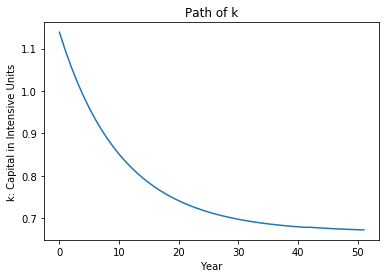

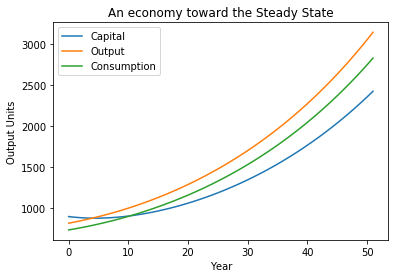

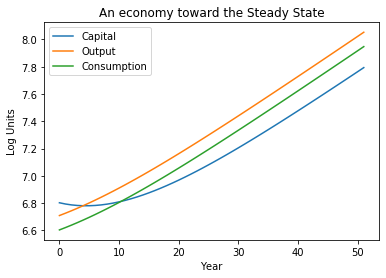

In [3]:
## Parameter Values
l = 0.01
z = 0.02/l
n = 0.01
s = 0.1
delta = 0.1
alpha = 0.33

## Define functions
# 1) Steady state of capital in intensive units

kstar = lambda s, delta, z, l, n, alpha: ((s/(delta + z*l + n)) ** (1/ (1-alpha))) * (1-l)



# 2) Output function

output=lambda K,L,A,alpha,l: K ** alpha * (A* L) ** (1-alpha) * (1-l)**(1 - alpha)

## Definiting intial values for the path of Capital, Labor, and TFP.

K0 = 900
L0 = 465 
A0 = 1.7 

##Preallocating arrays

L = np.array([L0])
A = np.array([A0])
K = np.array([K0])
Y = np.array([output(K[0],L[0],A[0],alpha,l)])
C = np.array([(1-s)*Y])
t = np.array([0])
Delta_K= np.array([0])
k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
k_ss = kstar(s, delta, z, l, n, alpha)


## Loop parameters

i = 0 #Start counter
epsilon=0.01 # while loop tolerance

## The first loop simulates an economy reaching the steady state. The second loop extends the simulation for 10 periods
## after the steady state has been reached.


while (abs(k[i] - k_ss)) >epsilon:
    i += 1    
    t = np.append(t, i) #Time vector
    L = np.append(L, L[i-1] * (1 + n)) #Labor Supply Path
    A = np.append(A, A[i-1] * (1 + z*l)) #TFP Path
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1]) #Change in capital stock
    K= np.append(K,K[i-1] + Delta_K[i]) #Capital Stock Path
    k = np.append(k,K[i] / (A[i] * L[i])) #Path of Capital in intensive units
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
print(len(t))
    
for i in range (i, i+10):
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K = np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

print(k_ss)    
print(K)

    
## Paths of Capital in intensive units, Capital, Output, and Consumption

plt.plot(t,k)
plt.xlabel('Year')
plt.ylabel('k: Capital in Intensive Units')
plt.title('Path of k')
plt.show()

plt.plot(t,K, label='Capital')
plt.plot(t,Y, label='Output')
plt.plot(t,C, label='Consumption')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

plt.plot(t,np.log(K), label='Capital')
plt.plot(t,np.log(Y), label='Output')
plt.plot(t,np.log(C), label='Consumption')
plt.xlabel('Year')
plt.ylabel('Log Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

$\bullet$ Capital per person became half by manipulating delta. The capital per person path found its new steady state after 42 years.

$\bullet$ Output and constumption level decreased. 

$\bullet$ Capital growth decreased about 5 periods and then it started growing again because the Solow-Romer model is increasing model. But the 'Capital' got the new path which is lower than the output and consumption. This low capital stock is making the Output and Consumption level lower.

b) How long will it take for the economy to reach the steady state? 

The economy reaches to the steady state after 42 years.

c) What are the welfare consequences of national unrest?

Migration is a big problem in the output side. Output and consumption which is a part of output have big impacts by the migration because the output is directly connected to the popualtion.

Capitals are not being cared because of the national unrest. This make the depletion rate higher. High deletion rate makes capital growth slow. Also, high depletion makes capital per person smaller. Capital is also related to the output directly. When capital level is low, the output level low.

From the national unrest, a country loses everything which is capital and labor.

## Part 2: AD-AS

[0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74
 0.74 0.74 0.74 0.74 0.74 0.74]


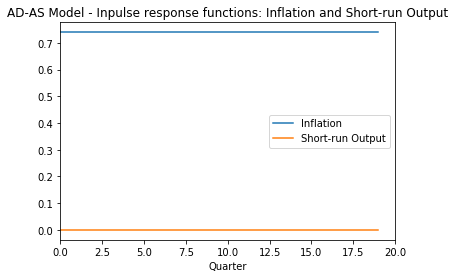

In [4]:
## Parameter Values paths

t = 20 # Each period is a quarter.
a = np.zeros(t) 
b = np.ones(t)/2
m = np.ones(t)
v = np.ones(t)/2
pi_bar = np.ones(t)*0.74 # Quarterly Inflation rate target - equivalent to 3% per year.
o = np.zeros(t)


# Preallocate loop variables

pi = np.zeros(t)
sr_y = np.zeros(t)

# Initial, steady state values for inflation and short run output

pi[0] = (pi_bar[0] + o[0] + (v[0]*b[0]*m[0])*pi_bar[0] + a[0]*v[0])/(1 + v[0]*b[0]*m[0])
sr_y[0] = a[0] -(b[0]*m[0])/(1 + v[0]*b[0]*m[0])*(pi[0] - pi_bar[0] + o[0] + a[0]*v[0])



# Sample: One period shock in period 1; increase in government expenditures of 15% of GDP.

# a[1:2] = 15  

for i in range(1,t):
    
    pi[i] = (pi[i-1] + o[i] + (v[i]*b[i]*m[i])*pi_bar[i] + a[i]*v[i])/(1 + v[i]*b[i]*m[i])
    sr_y[i] = a[i] -(b[i]*m[i])/(1 + v[i]*b[i]*m[i])*(pi[i] - pi_bar[i] + o[i] + a[i]*v[i])
    
print(pi_bar)   
## Impulse response function for inflation and short run output.

time = np.linspace(0,t-1,t)

plt.plot(time, pi , label = 'Inflation')
plt.plot(time, sr_y, label = 'Short-run Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Inpulse response functions: Inflation and Short-run Output')
plt.xlim(0, time.size) 
plt.legend()
plt.show()
plt.show()

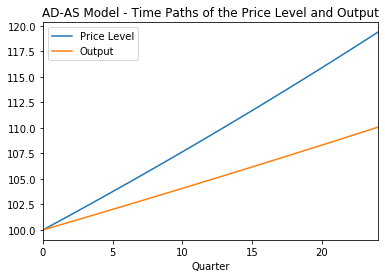

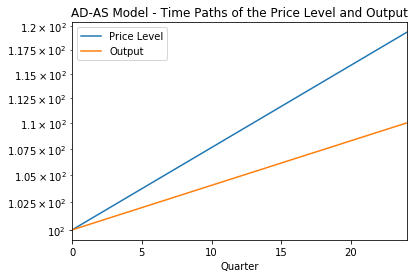

In [5]:
## Simulate the path of an economy starting in a balanced growth path, P[0]=100, and Y[0]=100

# Setting up the variable paths

n = 5   # number of periods preceeding the shock
y_growth_rate = 0.004 #Output growth rate, quarterly 
p_bar_before = 0.0074 #Economy inflation rate, quarterly
p = np.zeros(t+n)
y = np.zeros(t+n)

# Initial values for the series

y[0] = 100
p[0] = 100

# The economy before the shock

for i in range(1,n):
    y[i]=y[i-1]*(1+y_growth_rate)
    p[i] = p[i-1]*(1 + p_bar_before)

    
# The economy after the shock.

for i in range(n-1,t+n):
    y[i] = y[i-1]*(1 + y_growth_rate + sr_y[i-n]/100)
    p[i] = p[i-1]*(1 + pi[i-n]/100)
    

    
## The path of output and prices over time    
    
    
time2 = np.linspace(0,t+n-1,t+n)

plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.show()


plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.yscale('log')
plt.show()

### First quarter 2020 in the US

Four major events without precedent have taken place during the first quarter in 2020. The Federal Reserve has intervened in the economy with everything they have, and then some (click [HERE](https://www.wsj.com/articles/the-fed-transformed-jay-powell-leads-central-bank-into-uncharted-waters-11585596210)). Congress has moved to provide three stimulus package with a fourth on the way (click [HERE](https://www.wsj.com/articles/after-three-coronavirus-stimulus-packages-congress-is-already-prepping-phase-four-11585483203)). Oil markets have seen more volatility than in the 1980's (click [HERE](https://www.wsj.com/articles/oil-leaps-on-hopes-for-u-s-action-end-to-saudi-russia-spat-11585821756?mod=searchresults&page=1&pos=5)). Lastly, Covid-19 and the accompanying measures to contain it have hit households and firms hard. 

#### Model the events hitting the US economy using the AD-AS framework.

a) How do the events previously describe translate to parameter values in the AD-AS model? Justify your choices.

b) Analyze the path of the economy over time as it responds to the changes you made in part a). 

c) How long will it take for the economy to get back to potential output?

d) Assuming that the natural rate of unemployment is 5%, use Okun's law (Jones, p.248) to create an impulse response function (like the first graph) for cyclical unemployment. What is the highest unemployment rate the US could reach according to you? What does that mean for you as a future college graduate?

## Answers

a) How do the events previously describe translate to parameter values in the AD-AS model? Justify your choices.

$\bullet$ The Fed intervention: lowering the interest rate. Short-run output increases and inflation increases.

$\bullet$ Stimulus package: $\bar{a}$ (aggregate demand) increases. Governement purchases increase. Push AD curve to the right.

$\bullet$ Oil price went: an inflation shock ($\bar{o}$) increases, inflation suddenly increased by sudden oil price increase. Push AS curve to the left.

b) Analyze the path of the economy over time as it responds to the changes you made in part a). 

[ 0. -3.  0.  3. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


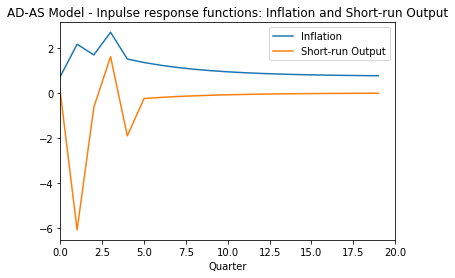

In [16]:
## Parameter Values paths

t = 20 # Each period is a quarter.
a = np.zeros(t) 
b = np.ones(t)/2
m = np.ones(t)
v = np.ones(t)/2
pi_bar = np.ones(t)*0.74 # Quarterly Inflation rate target - equivalent to 3% per year.
o = np.zeros(t)


# Preallocate loop variables

pi = np.zeros(t)
sr_y = np.zeros(t)

# Initial, steady state values for inflation and short run output

pi[0] = (pi_bar[0] + o[0] + (v[0]*b[0]*m[0])*pi_bar[0] + a[0]*v[0])/(1 + v[0]*b[0]*m[0])
sr_y[0] = a[0] -(b[0]*m[0])/(1 + v[0]*b[0]*m[0])*(pi[0] - pi_bar[0] + o[0] + a[0]*v[0])



# Sample: One period shock in period 1; increase in government expenditures of 10% of GDP.
a_i = np.array([-8, -4, -2, -1, 0])
a_g = np.array([10, 8, 8, 0, 0])
a_c = np.array([-5, -4, -3, -1, 0])
a[1:6] = a_i + a_g + a_c

o[1:2] = 4
pi_bar[1:2] = 0.03 # almost to the zero
m[1:3] = 2

for i in range(1,t):
    
    pi[i] = (pi[i-1] + o[i] + (v[i]*b[i]*m[i])*pi_bar[i] + a[i]*v[i])/(1 + v[i]*b[i]*m[i])
    sr_y[i] = a[i] -(b[i]*m[i])/(1 + v[i]*b[i]*m[i])*(pi[i] - pi_bar[i] + o[i] + a[i]*v[i])
    
print(a)   
## Impulse response function for inflation and short run output.

time = np.linspace(0,t-1,t)

plt.plot(time, pi , label = 'Inflation')
plt.plot(time, sr_y, label = 'Short-run Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Inpulse response functions: Inflation and Short-run Output')
plt.xlim(0, time.size) 
plt.legend()
plt.show()
plt.show()

[ 0. -3.  0.  3. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[100.         100.4        100.8016     101.2048064  101.59865638
 102.005051    96.19756343  95.97096473  97.90471569  96.42826036
  96.57633302  96.77223412  97.00669069  97.27231573  97.56321548
  97.87468181  98.20295011  98.5450079   98.89844329  99.26132445
  99.63210364 100.00954067 100.39264181 100.78061085 101.17281002]
why the potential output got lower ? 


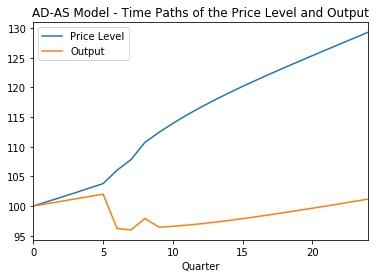

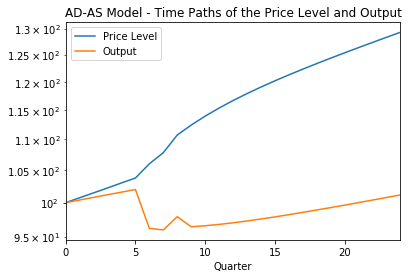

In [17]:
## Simulate the path of an economy starting in a balanced growth path, P[0]=100, and Y[0]=100

# Setting up the variable paths

n = 5   # number of periods preceeding the shock
y_growth_rate = 0.004 #Output growth rate, quarterly 
p_bar_before = 0.0074 #Economy inflation rate, quarterly
p = np.zeros(t+n)
y = np.zeros(t+n)

# Initial values for the series

y[0] = 100
p[0] = 100

# The economy before the shock

for i in range(1,n):
    y[i]=y[i-1]*(1+y_growth_rate)
    p[i] = p[i-1]*(1 + p_bar_before)

    
# The economy after the shock.

for i in range(n-1,t+n):
    y[i] = y[i-1]*(1 + y_growth_rate + sr_y[i-n]/100)
    p[i] = p[i-1]*(1 + pi[i-n]/100)
    

    
## The path of output and prices over time 
print(a)
print(y)
print("why the potential output got lower ? ") 
time2 = np.linspace(0,t+n-1,t+n)

plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.show()


plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.yscale('log')
plt.show()

$\bullet$Increased aggregate demand makes AD curve to the right. When everything is in the potential level, this causes short-run output percentage point in the positive level and inflation rate in the positive level.

$\bullet$In the IS-MP Framework, decreased interest rate makes short-run output percentage point in the positive level will cause inflation rate in the positive level according to the Phillps' Curve.

$\bullet$Increased inflation shock makes AS curve to the left. When everything is in the potential level, this causes short-run output percentage point in the negative level and inflation rate in the positive level.

All three things participate in increasing the inflation rate. Increased inflation shock makes short-run output rate decrease. But the other two impact is bigger than the increase of inflation shock, the economy is experiencing the increase in the short-run output. The actual output is above the potential output. The economy grows fast suddenly.

After the shocks, the AD curve comes back to its original place, but the AS curve comes back to its original position slowly because of the sticky-inflation. Also, because of the inflation's stickiness makes short-run output in the negative percentage point. This impact slows down the economy.

Inflation rate surges from the shocks, but the inflation growth rate decreases slowly after shocks due to the stickiness.

The output surges from the shocks. The economy stimulating was too success which made inflation rate too high. After the shocks, the economy plunges due to the inflation-stickiness which causes negative short-run output.

c) How long will it take for the economy to get back to potential output?

In [8]:
print("short-run",sr_y)
t = [0]
i = 0
while abs(sr_y[i + 1] - sr_y[0]) > 0.1:
    i += 1
    t = np.append(t,i)
    pi[i] = (pi[i-1] + o[i] + (v[i]*b[i]*m[i])*pi_bar[i] + a[i]*v[i])/(1 + v[i]*b[i]*m[i])
    sr_y[i] = a[i] -(b[i]*m[i])/(1 + v[i]*b[i]*m[i])*(pi[i] - pi_bar[i] + o[i] + a[i]*v[i])
print("It takes:", len(t), " years")  

short-run [ 0.          2.84        6.84        0.8256     -2.53952    -0.751616
 -0.6012928  -0.48103424 -0.38482739 -0.30786191 -0.24628953 -0.19703162
 -0.1576253  -0.12610024 -0.10088019 -0.08070415 -0.06456332 -0.05165066
 -0.04132053 -0.03305642]
It takes: 15  years


d) Assuming that the natural rate of unemployment is 5%, use Okun's law (Jones, p.248) to create an impulse response function (like the first graph) for cyclical unemployment. What is the highest unemployment rate the US could reach according to you? What does that mean for you as a future college graduate?

[-0.         -1.42       -3.42       -0.4128      1.26976     0.375808
  0.3006464   0.24051712  0.1924137   0.15393096  0.12314477  0.09851581
  0.07881265  0.06305012  0.0504401   0.04035208  0.03228166  0.02582533
  0.02066026  0.01652821]


<function matplotlib.pyplot.show(*args, **kw)>

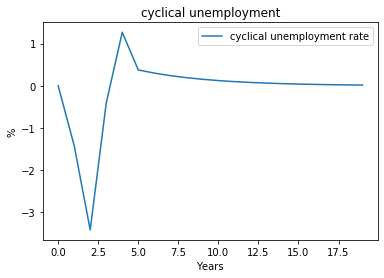

In [9]:
sr_y

cyun =- 0.5*sr_y
print(cyun)

plt.plot(time, cyun, label = "cyclical unemployment rate")
plt.xlabel("Years")
plt.ylabel("%")
plt.title("cyclical unemployment")
plt.legend()
plt.show

The highest unemployment rate year is right after the shocks end. The unemplyment is 6.12982%. This is because the short-run output is at the most negative percentage point.

The shocks I made in total effect is stimulating the economy. During the shocks implmented year, who's graduating this year will have a job easier than before students because the cyclical unemployment is lower than natural unemployment. I will graduate in two year which means that I am graduating when the cyclical unemplyment is positive and the short-run output rate is in negative percentage point. So, I will have a harder time to get a job than the other years graduates except for the one year after the end of shock year graduates.

## Part 3: DGE

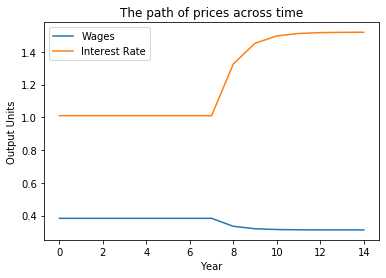

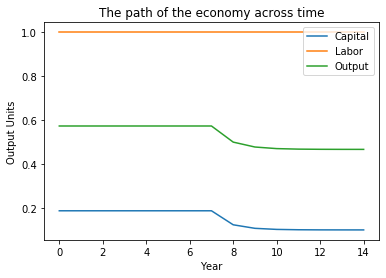

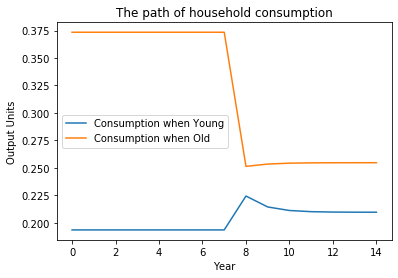

In [10]:
#Parameter values

t = 15
alpha=1/3
beta= 0.98
delta=0.04

# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

# Functions

output = lambda K,L,alpha: K ** alpha * (L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha 
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha))

#Preallocating arrays and initial values.

w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)])
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0])
k_2 = np.array([beta/(1+beta)*w_0])
K = k_2
Y = output(K,1,alpha)

alpha= np.ones(t) * alpha 
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 

# Sample shock, permanent decrease in the discount rate at period 8

beta[8:15] = 0.98/2

i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],1,alpha[i]))    
    

time=np.linspace(0,t-1,t)

plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()

### Fundamental Changes to the Economy

The Covid-19 emergency will have repercussions on households and firms fundamentals. Many households found themselves without an emergency fund to draw upon. At the same time there is a push to increase the power of workers in the US corporate system. These two pressures will likely lead to an increase in savings and the share of income that is accrued by households.

#### Model the fundamental changes in the economy using the DGE model.

a) How do the events previously describe translate to parameter values in the DGE model? Justify your choices.

b) Analyze the path of the economy over time as it responds to the changes you made in part a). 

c) Assume the changes in the parameters of the model only affect one generation. How many generations will live with the decisions of their predecesors?

d) The DGE model we've worked with is only the most basic model of this type. Suggest one possible extension to the model and explain how that extension might change your results from part a) and b)


## Answers

a) How do the events previously describe translate to parameter values in the DGE model? Justify your choices.

$\beta$ increases: saving is ${wt}(\frac{\beta}{\beta+1})$. Increase in savings lead $\beta$ to increase.

$\alpha$ decreases: The share of income accrued by household means the share of income accrued by labor. the share of income is $\frac{(1-\alpha)(L)}{Y}$. So, increase in the share of income means $\alpha$ becomes smaller than before. 

[0.38295131 0.38295131 0.38295131 0.38295131 0.38295131 0.38295131
 0.38295131 0.38295131 0.38295131 0.38295131 0.38295131 0.66527459
 0.72273576 0.73177292 0.7331382  0.73334322 0.73337397 0.73337859
 0.73337928 0.73337938]


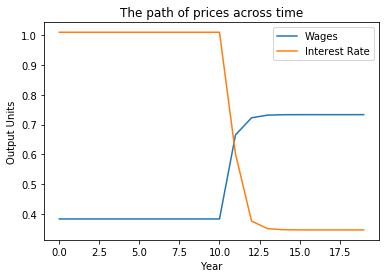

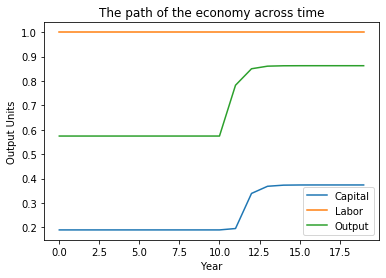

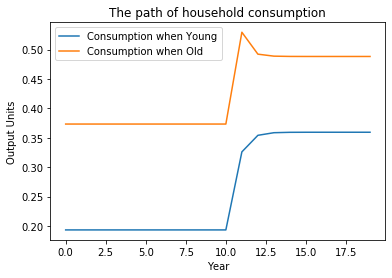

In [11]:
#Parameter values

t = 20
alpha= 1/3 #I will 0.33 --> 0.15
beta= 0.98 #I will 0.98 --> 1.04
delta=0.04

# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

# Functions

output = lambda K,L,alpha: K ** alpha * (L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha 
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha))

#Preallocating arrays and initial values.

w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)])
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0])
k_2 = np.array([beta/(1+beta)*w_0])
K = k_2
Y = output(K,1,alpha)

alpha= np.ones(t) * alpha 
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 

# Sample shock, permanent decrease in the discount rate at period 8

beta[11:20] = 1.04
alpha[11:20] = 0.15

i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],1,alpha[i]))    
    
print(w)
time=np.linspace(0,t-1,t)

plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()

b) Analyze the path of the economy over time as it responds to the changes you made in part a).

I set a graph to have a shock at period 10 to see the change, $\alpha$ decreases and $\beta$ increases

All of the path start from the steady states, so all the values are flat and steady till they have any shock.

When $\beta$ increases, $\frac{\beta}{1+\beta}$ value increases. When $\alpha$ decreases, (1 - alpha)**(1/(1-alpha) increases.

b-1) Wage increased and the interest rate decreased

$\bullet$ MPK = ${\alpha}\frac{Y}{K}$ is the interest rate. So, decreased $\alpha$ makes the interest rate decreased.
 
$\bullet$ MPL = ${(1-\alpha)}\frac{Y}{L}$ is the wage. So, decreased $\alpha$ makes the wage increased.
 
b-2) Output and Capital increased
 
$\bullet$ Capital is decided by savings which is $\frac{\beta}{1+\beta}{w_{t-1}}$. increased $\beta$ and increased wage increases 'Capital' too.
 
$\bullet$ Output is $K^{\alpha}L^{1-\alpha}$. As 'Capital' increases. The 'Output' increased by the change of $(\frac{\beta}{1+\beta}*wage.increased)^{\alpha}$ much, which how much change in Capital and powered ${\alpha}$ much. (${\triangle}Capital)^{\alpha}$
 
$\bullet$ As saving increased, investment increases which will make capital increase and then output increases.
 
b-3) Consumption when yound and consumption when old increased

$\bullet$Steady consumption when young is $\frac{1}{1+\beta}({1-\alpha})^{\frac{1}{1-\alpha}}(\frac{\beta}{1+\beta})^{\frac{\alpha}{1-\alpha}}$. $\frac{1}{1+\beta}$ is decreasing but other elements are incresing bigger than $\frac{1}{1+\beta}$. In the optimal consumption when young formula is $\frac{w_{t}}{1+\beta}$, the wage increases more than $\beta$ increase, so the consumption when young increases. As the wage increases consumption increases. 

$\bullet$In the formula of steady consumption when old, the interest rate decreases, but the other elements increases bigger the consumption when old increases. Also, saving more and increased wage makes the consumption when old increase.

$\bullet$As the wage increases, saving can be increased even by the lower interest rate. And then old consumption increases too.

c) Assume the changes in the parameters of the model only affect one generation. How many generations will live with the decisions of their predecesors?

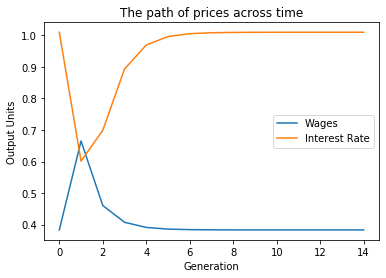

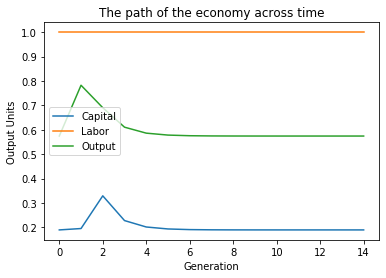

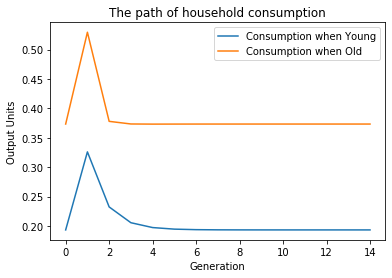

In [12]:
#Parameter values

t = 15
alpha= 1/3 #0.33 --> 0.15
beta= 0.98 #0.98 --> 1.04
delta=0.04

# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

# Functions

output = lambda K,L,alpha: K ** alpha * (L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha 
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha))

#Preallocating arrays and initial values.

w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)])
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0])
k_2 = np.array([beta/(1+beta)*w_0])
K = k_2
Y = output(K,1,alpha)

alpha= np.ones(t) * alpha 
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 

# Sample shock, permanent decrease in the discount rate at period 8

beta[1:2] = 1.04
alpha[1:2] = 0.15

i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],1,alpha[i]))    
    
time=np.linspace(0,t-1,t)

plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Generation')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Generation')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Generation')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()


In [13]:
print("wage:", w)
t=[0]
#print(w)
#print(w[1])
i = 0
while abs(w[i+1] - w[0]) > 0.0000001:
    i += 1
    t = np.append(t,i)
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],1,alpha[i]))
print("It takes",len(t),"years")
print("adding more zeros leads me to highier years")

wage: [0.38295131 0.66527459 0.46035834 0.40718744 0.39086534 0.38557135
 0.38382267 0.38324154 0.38304803 0.38298354 0.38296205 0.38295489
 0.3829525  0.3829517  0.38295144]


IndexError: index 15 is out of bounds for axis 0 with size 15

d) The DGE model we've worked with is only the most basic model of this type. Suggest one possible extension to the model and explain how that extension might change your results from part a) and b)

America is the top innovation country. So, I want to suggest to put knowledge "A" in the output. Knowledge starts with 1.

In [ ]:
#Parameter values

t = 15
alpha=1/3
beta= 0.98
delta=0.04
A0 = 1
g = 0.04
# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

# Functions

output = lambda K,A,L,alpha: K ** alpha * (A*L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha 
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha))

#Preallocating arrays and initial values.

w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)])
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0])
k_2 = np.array([beta/(1+beta)*w_0])
K = k_2
Y = output(K,A0,1,alpha)

alpha= np.ones(t) * alpha 
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 
A = np.array([A0])
# Sample shock, permanent decrease in the discount rate at period 8

beta[8:15] = 0.98/2

i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    A = np.append(A, A[i-1]*(1+g))
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],A[i-1],1,alpha[i]))    
    
time=np.linspace(0,t-1,t)

plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()

As knowledge(technology) grows, the increase in output is observed. But the knowledge is not related to people's the decision to work and consumption, people's behavior is not changing. Consumtion rate is not changing which saving and consumption when old is not changing. Knowledge is now related to $\alpha$ and $\beta$, so other elements are not changing. As a conclusion, the rate of the elements are not changing if people's bahvior is not chnaging to the technology improvment and output improvment. I could not apply to this model, but I'm sure there are connection between the the changes of knowledge and the changes of people's behavior at least in a short-run. Such as, in the beginning of iphone.